In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import graphviz
import os
import mglearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = 'C:/Windows/Fonts/H2GTRM.TTF').get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 7.1 문자열 데이터 타입

문자열 데이터 종류  
- 범주형 데이터
- 범주에 의미를 연결시킬 수 있는 임의의 문자열
- 구조화된 문자열 데이터
- 텍스트 데이터

- **범주형 데이터**는 고정된 목록으로 구성됩니다.  
(ex 1) 사람들에게 가장 좋아하는 색을 묻는 설문으로 데이터 수집(드롭다운 메뉴)  
    데이터셋에 '빨강', '녹생', '파랑' 등 8개의 값 중 하나가 들어가며 당연히 범주형 변수로 인코딩됨  
    -> 고유한 값을 찾아 얼마나 자주 나타나는지 히스토그램을 그려볼 수 있음  
    -> 각 값이 어플리케이션에서 생각하는 범주에 적절한지 확인  
    -> 예를 들어 '검정'을 '검점'으로 쓴 오타가 있다면 같은 의미이므로 두 값을 하나로 합쳐야 함  
    

- 텍스트 필드로 받는 응답은 **범주에 의미를 연결시킬 수 있는 임의의 문자열**에 해당합니다.  
(ex 2) 사람들에게 가장 좋아하는 색을 묻는 설문으로 데이터 수집(텍스트 필드)  
    -> 철자가 틀리거나 '회색', '쥐색'처럼 다르게 쓸 수 있음  
    -> 매우 이상한 이름을 입력받을 수도 있음   
    
    
- 미리 정의된 범주에 속하지 않지만 직접 입력한 값들이 주소나 장소, 사람 이름, 날짜, 전화번호, 식별번호처럼 일정한 **구조**를 가지기도 함  


- 자유로운 형태의 절과 문장으로 구성된 **텍스트 데이터**는 트위터, 채팅, 호텔 리뷰, 셰익스피어 작품, 위키백과 문서 등이 있습니다.  
    -> 대부분 단어로 구성된 문장에 정보를 담고 있음  
        (데이터셋 : 말뭉치, 하나의 텍스트를 의미하는 각 데이터 포인트 : 문서)

# 7.2 예제 어플리케이션 : 영화 리뷰 감성 분석

- 스탠퍼드 대학교 연구원인 앤드루 마스가 IMDb 웹사이트에서 수집한 영화 리뷰 데이터셋 사용  
(리뷰 텍스트와 '양성' 혹은 '음성'을 나타내는 레이블 포함)

http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz 에서 데이터 다운받아 압축 풀기

In [2]:
# !은 셸(shell) 명령을 실행해주는 IPython의 매직 명령어입니다.
# tree 명령이 없다면 find ./data -type d 명령을 사용해 하위 폴더의 목록을 볼 수 있습니다.
!tree data/aclImdb

폴더 PATH의 목록입니다.
볼륨 일련 번호는 A488-433A입니다.
C:\USERS\HYOOO\바탕 화면\복습\INTRODUCTION TO MACHINE LEARNING WITH PYTHON\DATA\ACLIMDB
├─test
│  ├─neg
│  └─pos
└─train
    ├─neg
    └─pos


In [3]:
# 레이블이 없는 데이터를 담고 있는 unsup 폴더는 사용하지 않으므로 삭제합니다.
!rm -r data/aclImdb/train/unsup

rm: cannot remove 'data/aclImdb/train/unsup': No such file or directory


In [4]:
from sklearn.datasets import load_files

reviews_train = load_files('data/aclImdb/train/')

# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target

print("text_train의 타입 :", type(text_train))
print("text_train의 길이 :", len(text_train))
print("text_train[6] :\n", text_train[6])

text_train의 타입 : <class 'list'>
text_train의 길이 : 25000
text_train[6] :
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


-> 리뷰는 HTML 줄바꿈 태그를 포함하고 있음

In [5]:
# 태그를 삭제하여 데이터 정리
text_train = [doc.replace(b'<br />', b' ') for doc in text_train]

In [6]:
# 양성 클래스와 음성 클래스를 같은 비율로 수집했기 때문에 양성과 음성 레이블의 수는 같습니다.
print("클래스별 샘플 수 (훈련 데이터) :", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터) : [12500 12500]


In [7]:
reviews_test = load_files('data/aclImdb/test/')
text_test, y_test = reviews_test.data, reviews_test.target

print("테스트 데이터의 문서 수 :", len(text_test))
print("클래스별 샘플 수 (테스트 데이터) :", np.bincount(y_test))
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]

테스트 데이터의 문서 수 : 25000
클래스별 샘플 수 (테스트 데이터) : [12500 12500]


#### <우리가 풀려는 문제 >  
1. 리뷰가 하나 주어짐  
2. 리뷰의 텍스트 내용을 보고 '양성'인지 '음성'인지 구분하는 것  
-> 전형적인 이진분류 문제

# 7.3 텍스트 데이터를 BOW로 표현하기

머신러닝에서 텍스트를 표현하는 방법 중 **BOW**(bag of words)는 가장 간단하지만 효과적이면서 널리 쓰이는 방법  
- 전체 말뭉치에 대해 BOW 표현을 계산하려면 다음 세 단계를 거칩니다.  
    1. **토큰화**(tokenization)  
        각 문서를 문서에 포함된 단어(토큰)으로 나눕니다. 예를 들어 공백이나 구둣점 등을 기준으로 분리합니다.  
    2. **어휘 사전 구축**  
        모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매깁니다(알파벳 순서).  
    3. **인코딩**  
        어휘 사전의 단어가 문서마다 몇 번이나 나타나는지를 헤아립니다.

### 7.3.1 샘플 데이터에 BOW 적용하기

BOW 표현은 CountVectorizer에 변환기 인터페이스로 구현되어 있습니다.

In [8]:
bards_words = ['The fool doth think he is wise,',
               'but the wise man knows himself to be a fool']

In [9]:
# CountVectorizer 임포트하고 객체 생성 후 샘플 데이터에 fit 적용
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [10]:
# 훈련 데이터를 토큰으로 나누고 어휘 사전을 구축하여 vocabulary_ 속성에 저장
print("어휘 사전의 크기 :", len(vect.vocabulary_))
print("어휘 사전의 내용 :\n", vect.vocabulary_)

어휘 사전의 크기 : 13
어휘 사전의 내용 :
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [11]:
# 훈련 데이터에 대해 BOW 표현을 만들기 위해 transform 호출
bag_of_words = vect.transform(bards_words)
print("BOW :", repr(bag_of_words))

BOW : <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


-> BOW 표현은 0이 아닌 값만 저장하는 2 x 13 크기의 SciPy 희소 행렬로 저장되어 있습니다.  
    (각각의 행은 하나의 데이터 포인트를 나타내고, 각 특성은 어휘사전에 있는 각 단어에 대응)

In [12]:
# 희소 행렬의 실제 내용을 보기 위해 toarray메서드로 밀집된 Numpy 배열로 바꿈
print("BOW의 밀집 표현 :\n", bag_of_words.toarray())

BOW의 밀집 표현 :
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


-> 숫자는 각 단어의 출현 횟수  
(bards_words에 있는 두 문자열 모두 같은 단어를 두 개 이상 가지고 있지 않음)  
-> 'The fool doth think he is wise,' 문자열은 첫 번째 행으로, 어휘 사전의 첫 번째 단어인 'be'가 0번 나옴.  
-> 어휘 사전의 두 번째 단어인 'but'도 0번, 세 번째 단어 'doth'는 1번 나오는 식입니다.

## 7.3.2 영화 리뷰에 대한 BOW

영화 리뷰에 대한 감성분석 적용

In [13]:
# 앞에서 IMDb 리뷰의 훈련 데이터와 테스트 데이터를 읽어서 작업할 문자열 리스트로 바꿈
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train :\n", repr(X_train))

X_train :
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [14]:
# CountVectorizer 객체의 get_feature_name 메서드는 각 특성에 해당하는 단어를 리스트로 반환
feature_names = vect.get_feature_names()
print("특성 개수 :", len(feature_names))
print("\n처음 20개 특성 :\n", feature_names[:20])
print("\n20010에서 20030까지 특성 :\n", feature_names[20010:20030])
print("\n매 2000번째 특성 :\n", feature_names[::2000])

특성 개수 : 74849

처음 20개 특성 :
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']

20010에서 20030까지 특성 :
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']

매 2000번째 특성 :
 ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


-> 리뷰 어딘가에 나타난 숫자들이 어휘 사전의 단어로 추출됨 (이러한 숫자 대부분은 그 자체로 의미가 있지 않음)  
-> 'draught', 'drawback', 'drawer' 모두 단수와 복수형이 서로 다른 단어로 어휘사전에 포함되어 있음  
(의미가 매우 비슷하기 때문에 다른 특성으로 간주하여 개별적으로 기록하는 것은 바람직하지 않음)

In [15]:
# 분류기 만들어 성능 수치 확인
# y_train에 있는 훈련 레이블과 X_train에 있는 훈련 데이터의 BOW 표현으로 분류기 학습
# 교차 검증을 사용해 LogisticRegression 모델의 성능 평가
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv = 5)
print("크로스 밸리데이션 평균 점수 : {:.2f}".format(np.mean(scores)))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


크로스 밸리데이션 평균 점수 : 0.88


In [16]:
# 그리드 서치를 사용해 규제 매개변수 C 조정
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)

print("최상의 크로스 밸리데이션 점수 : {:.2f}".format(grid.best_score_))
print("최적의 매개변수 : ", grid.best_params_)

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 크로스 밸리데이션 점수 : 0.89
최적의 매개변수 :  {'C': 0.1}


In [17]:
# C = 0.1을 사용해서 테스트 세트 일반화 성능 확인
X_test = vect.transform(text_test)
print("테스트 점수 : {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수 : 0.88


< 단어 추출 방법 개선할 차례 >  
-> CountVectorizer는 기본적으로 '\b\w\w+\b' 정규표현식을 사용해 토큰을 추출  
(경계\b가 구분되고 적어도 둘 이상의 문자나 숫자\w가 연속된 단어를 찾음)  
-> 한 글자로 된 단어는 찾지 않고, "doesn't"와 같은 축약형이나 "bit.ly"같은 단어는 분리되고 "h8ter"는 한 단어로 매칭  
-> CountVectorizer는 모든 단어를 소문자로 바꾸므로 'soon', 'Soon', 'sOon'이 모두 같은 토큰(특성)  
-> 숫자와 같은 의미 없는 특성을 줄이는 방법은 적어도 두 개의 문서에 나타난 토큰만을 사용하는 것

In [18]:
# min_df 매개변수로 토큰이 나타날 최소 문서 개수를 지정할 수 있습니다.
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train :", repr(X_train))

min_df로 제한한 X_train : <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


-> 토큰이 적어도 다섯 번 이상 나타나야 하므로 특성의 수가 원래 갯수의 1/3정도인 27,271개로 줆

In [19]:
feature_names = vect.get_feature_names()

print("처음 50개 특성 :\n", feature_names[:50])
print("\n20,010부터 20,030까지의 특성 :\n", feature_names[20010:20030])
print("\n매 700번째 특성 :\n", feature_names[::700])

처음 50개 특성 :
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']

20,010부터 20,030까지의 특성 :
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']

매 700번째 특성 :
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recip

In [20]:
# 그리드 서치를 사용해 모델의 성능 확인
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)
print("최적의 교차 검증 점수 : {:.2f}".format(grid.best_score_))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최적의 교차 검증 점수 : 0.89


-> 모델 성능은 높아지지 않았지만 특성의 갯수가 줄어서 처리 속도가 빨라졌고, 불필요한 특성이 없어져 모델을 이해하기 쉬움

# 7.4 불용어

너무 빈번하여 유용하지 않은 단어를 제외하는 방법
1. 언어별 불용어(stopword)목록을 사용하는 것
2. 너무 자주 나타나는 단어 제외

In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("불용어 갯수 :", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어 :\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 갯수 : 318
매 10번째 불용어 :
 ['former', 'i', 'twenty', 'hasnt', 'the', 'become', 'somehow', 'well', 'whereupon', 'therein', 'last', 'being', 'became', 'give', 'wherein', 'will', 'are', 'while', 'bill', 'and', 'had', 'if', 'thru', 'every', 'thereafter', 'my', 'someone', 'mill', 'hence', 'otherwise', 'call', 'nowhere']


In [22]:
# stop_words = 'english'라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
# 불용어를 제외하면 318개만큼 줄어들지 확인
vect = CountVectorizer(min_df = 5, stop_words = 'english').fit(text_train)
X_train = vect.transform(text_train)

print("불용어가 제거된 X_train :\n", repr(X_train))

불용어가 제거된 X_train :
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


-> 특성이 27,271개에서 26,966개로 305개 줆

In [23]:
# 그리드 서치 다시 적용
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)

print("최상의 교차 검증 점수 : {:.2f}".format(grid.best_score_))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수 : 0.88


-> 불용어를 사용한 그리드 서치의 성능은 오히려 감소  
(고정된 불용어 목록은 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서나 도움이 됨)

# 7.5 tf-idf로 데이터 스케일 변경하기

중요하지 않아 보이는 특성을 제외하는 대신,  
얼마나 의미 있는 특성인지를 계산하여 스케일을 조정하는 방식으로  
가장 널리 알려진 방식은 **td-idf**(term frequency-inverse document frequency)입니다.  
-> tf-idf는 말뭉티의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법  
  
<문서 d에 있는 단어 w에 대한 td-idf 점수>  
$$\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)$$  

__N__은 훈련세트에 있는 문서 갯수, **N_w**는 단어 w가 나타난 훈련 세트 문서의 갯수,  
**tf**(단어 빈도수)는 단어 w가 대상 문서 d(변환 또는 인코딩하려는 문서)에 나타난 횟수  

-> 계산 후 L2 정규화 적용(유클리디안 노름이 1이 되도록 각 문서 벡터의 스케일을 바꿈)  
**이렇게 스케일이 바뀐 벡터는 문서의 길이(단어의 수)에 영향을 받지 않음!!**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df = 5), LogisticRegression())
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(text_train, y_train)

print("최상의 교차 검증 점수 : {:.2f}".format(grid.best_score_))

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수 : 0.89


-> tf-idf가 성능에 큰 영향을 주지 못함  
- tf-idf는 어떤 단어가 가장 중요한지 알려줌
- tf-idf 변환은 문서를 구별하는 단어를 찾는 방법이지만 완전히 비지도 학습

In [25]:
# 파이프라인에서 TfidfVectorizer 단계를 선택
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

# 훈련 데이터셋을 변환합니다.
X_train = vectorizer.transform(text_train)

# 특성별로 가장 큰 값을 찾습니다.
max_value = X_train.max(axis = 0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# 특성 이름을 구합니다.
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성 :\n", feature_names[sorted_by_tfidf[:20]])

print("가장 높은 tfidf를 가진 특성 :\n", feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성 :
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성 :
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


- tf-idf가 낮은 특성 : 전체 문서에 걸쳐 매우 많이 나타나거나, 조금씩 사용되거나, 매우 긴 문서에서만 사용
- tf-idf가 높은 특성 : 어떤 쇼나 영화를 나타내는 경우 (특정한 쇼나 드라마에 대한 리뷰에서만 나타남)
- 특정 리뷰에서 매우 자주 나타나는 경향이 있는 단어들 : pokemon, smallville(드라마 제목), doodlebops, scanners(실제 영화 제목)

In [26]:
# 자주 나타나서 덜 중요하다고 생각되는 단어 확인
# 훈련 세트의 idf값은 idf_ 속성에 저장되어 있습니다.
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성 :\n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성 :
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


-> 대부분 'the', 'no'와 같은 영어의 불용어, 일부는 'movie', 'film', 'story'등 영화 리뷰에서만 나타나는 단어  
-> 'good', 'great', 'bad'도 매우 자주 나타나는 단어라서 감성 분석에는 매우 중요하지만 tf-idf로 봤을 때는 덜 중요한 단어로 인식됨

# 7.6 모델 계수 조사

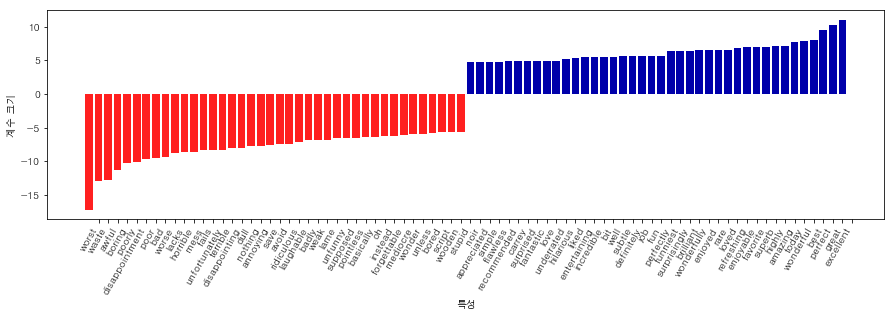

In [27]:
# tf-idf 특성으로 훈련시킨 마지막 모델을 사용하여 가장 큰 값의 계수와 해당 단어를 확인
mglearn.tools.visualize_coefficients(
grid.best_estimator_.named_steps['logisticregression'].coef_[0],
feature_names, n_top_features = 40)

-> 로지스틱 회귀의 가장 큰 계수 40개와 가장 작은 계수 40개  
(막대의 크기는 계수의 크기)  
-> 왼쪽의 음수 계수는 부정적인 리뷰를 의미하는 단어  
-> 오른쪽 양수 계수는 긍정적인 리뷰의 단어에 해당

# 7.7 여러 단어로 만든 BOW(n-그램)

- BOW 표현 방식은 단어의 순서가 완전히 무시된다는 큰 **단점**이 있습니다.  
    -> "it's bad, not good at all"과 "it's good, not bad at all"이 완전히 동일하게 변환  
- 토큰 하나의 횟수만 고려하지 않고 옆에 있는 두세 개의 토큰을 함께 고려하는 방식으로 문맥을 고려할 수 있습니다.  
(토큰 두 개를 **바이그램**, 세 개를 **트라이그램**이라고 하며 일반적으로 연속된 토큰을 **n-그램**이라고 함)  
- CountVectorizer와 TfidfVectorizer는 ngram_range 매개변수에 특성으로 고려할 토큰의 범위를 지정할 수 있습니다.  
(ngram_range 매개변수의 입력값은 튜플이며 연속된 토큰의 최소 길이와 최대 길이)

In [28]:
print("bards_words :\n", bards_words)

bards_words :
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [30]:
# 기본값은 최소 길이가 1이고 최대 길이가 1인 토큰마다 하나의 특성을 만듭니다.
cv = CountVectorizer(ngram_range = (1, 1)).fit(bards_words)
print("어휘 사전 크기 :", len(cv.vocabulary_))
print("어휘 사전 :\n", cv.get_feature_names())

어휘 사전 크기 : 13
어휘 사전 :
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


-> 토큰 하나를 **유니그램**이라고 함

In [31]:
# 토큰 두 개가 연속된 바이그램만 만듭니다.
cv = CountVectorizer(ngram_range = (2, 2)).fit(bards_words)
print("어휘 사전 크기 :", len(cv.vocabulary_))
print("어휘 사전 :\n", cv.get_feature_names())

어휘 사전 크기 : 14
어휘 사전 :
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


-> 연속된 토큰의 수가 커지면 보통 특성이 더 구체적이고 많이 만들어짐  
(bard_words에 이쓴ㄴ 두 문장 사이에는 고통된 바이그램이 없음)

In [32]:
print("변환된 데이터 (밀집 배열) :\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열) :
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [ ]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# 매개변수 조합이 많고 트라이그램이 포함되어 있기 때문에
# 그리드 서치 실행에 시간이 오래 걸립니다
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n", grid.best_params_)

In [ ]:
# 그리드 서치에서 테스트 점수를 추출합니다
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [ ]:
# 특성 이름과 계수를 추출합니다
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)
plt.ylim(-22, 22)

In [ ]:
# 트라이그램 특성을 찾습니다
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냅니다
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)